In [1]:
# importing libraries

import pandas as pd
import numpy as np
import category_encoders as ce
from sklearn.model_selection import train_test_split
from pycaret.regression import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\Harshita\\Desktop\\Data Science\\Crop Prices Prediction\\Dataset\\corn yield.csv")

In [3]:
df.columns

Index(['Program', 'Year', 'Period', 'Week Ending', 'Geo Level', 'State',
       'State ANSI', 'Ag District', 'Ag District Code', 'County',
       'County ANSI', 'Zip Code', 'Region', 'watershed_code', 'Watershed',
       'Commodity', 'Data Item', 'Domain', 'Domain Category', 'Value',
       'CV (%)'],
      dtype='object')

In [4]:
df.head()

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,County ANSI,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,SURVEY,2015,YEAR,NaN,STATE,ALABAMA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,"245,000",NaN
1,SURVEY,2015,YEAR,NaN,STATE,ALABAMA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - PRODUCTION, MEASURED IN BU",TOTAL,NOT SPECIFIED,"36,015,000",NaN
2,SURVEY,2015,YEAR,NaN,STATE,ALABAMA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CORN,"CORN, SILAGE - ACRES HARVESTED",TOTAL,NOT SPECIFIED,"9,000",NaN
3,SURVEY,2015,YEAR,NaN,STATE,ALABAMA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CORN,"CORN, SILAGE - YIELD, MEASURED IN TONS / ACRE",TOTAL,NOT SPECIFIED,15,NaN
4,SURVEY,2015,YEAR,NaN,STATE,ARIZONA,4.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,"34,000",NaN


### Data inspection


In [5]:
df.describe()

,Year,Week Ending,State ANSI,Ag District,Ag District Code,County,County ANSI,Zip Code,Region,watershed_code,Watershed,CV (%)
count,23474.000000,0.0,23440.000000,0.0,0.0,0.0,0.0,0.0,0.0,23474.0,0.0,0.0
mean,1954.280907,NaN,30.023379,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
std,40.371092,NaN,15.388973,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
min,1866.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
25%,1925.000000,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
50%,1956.000000,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
75%,1989.000000,NaN,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
max,2015.000000,NaN,56.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23474 entries, 0 to 23473
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Program           23474 non-null  object 
 1   Year              23474 non-null  int64  
 2   Period            23474 non-null  object 
 3   Week Ending       0 non-null      float64
 4   Geo Level         23474 non-null  object 
 5   State             23474 non-null  object 
 6   State ANSI        23440 non-null  float64
 7   Ag District       0 non-null      float64
 8   Ag District Code  0 non-null      float64
 9   County            0 non-null      float64
 10  County ANSI       0 non-null      float64
 11  Zip Code          0 non-null      float64
 12  Region            0 non-null      float64
 13  watershed_code    23474 non-null  int64  
 14  Watershed         0 non-null      float64
 15  Commodity         23474 non-null  object 
 16  Data Item         23474 non-null  object

In [7]:
for i in df.columns:
    print(df[i].value_counts())
    

SURVEY    23474
Name: Program, dtype: int64
2015    496
2014    483
2012    483
2013    376
1944    192
1924    192
1940    192
1925    192
1941    192
1926    192
1942    192
1927    192
1943    192
1945    192
1929    192
1923    192
1930    192
1946    192
1931    192
1947    192
1932    192
1933    192
1935    192
1939    192
1928    192
1937    192
1936    192
1938    192
1952    190
1919    190
1948    190
1949    190
1934    190
1950    190
1922    190
1920    190
1953    190
1951    190
1921    190
1955    190
1954    190
1957    186
1958    186
1956    186
1963    184
1961    184
1959    184
1965    184
1964    184
1962    184
1966    184
1960    184
1976    178
2007    178
2011    178
1975    178
2000    178
2006    178
1969    178
2008    178
2010    178
1977    178
2004    178
1973    178
1967    178
1970    178
1971    178
2003    178
1972    178
2002    178
1968    178
1974    178
2001    178
2009    178
2005    178
1984    176
1999    176
1983    176
1978    176
1994    

## Data preprocessing

In [8]:
cols_to_be_removed = ["Program","Week Ending","Ag District","Ag District Code","County","County ANSI","Zip Code","Region","Watershed","CV (%)","Domain Category","Commodity","Geo Level","watershed_code","Domain"]

In [9]:
df.drop(columns=cols_to_be_removed,axis = 1,inplace=True)

In [10]:
prof = pp.ProfileReport(df)

In [11]:
prof

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
#Trwating null values
df["State ANSI"].fillna(0,inplace=True)

In [13]:
#Checking null values
df.isnull().sum()

Year          0
Period        0
State         0
State ANSI    0
Data Item     0
Value         0
dtype: int64

In [14]:
for i in df.columns:
    print(df[i].value_counts())

2015    496
2014    483
2012    483
2013    376
1944    192
1924    192
1940    192
1925    192
1941    192
1926    192
1942    192
1927    192
1943    192
1945    192
1929    192
1923    192
1930    192
1946    192
1931    192
1947    192
1932    192
1933    192
1935    192
1939    192
1928    192
1937    192
1936    192
1938    192
1952    190
1919    190
1948    190
1949    190
1934    190
1950    190
1922    190
1920    190
1953    190
1951    190
1921    190
1955    190
1954    190
1957    186
1958    186
1956    186
1963    184
1961    184
1959    184
1965    184
1964    184
1962    184
1966    184
1960    184
1976    178
2007    178
2011    178
1975    178
2000    178
2006    178
1969    178
2008    178
2010    178
1977    178
2004    178
1973    178
1967    178
1970    178
1971    178
2003    178
1972    178
2002    178
1968    178
1974    178
2001    178
2009    178
2005    178
1984    176
1999    176
1983    176
1978    176
1994    176
1981    176
1998    176
1982    176
1980

In [15]:
df["Value"] = df["Value"].str.replace(',','')
df["State ANSI"] = df["State ANSI"].astype("int")
df["Value"] = df["Value"].astype("float")

In [16]:
df.head()

,Year,Period,State,State ANSI,Data Item,Value
0,2015,YEAR,ALABAMA,1,"CORN, GRAIN - ACRES HARVESTED",245000.0
1,2015,YEAR,ALABAMA,1,"CORN, GRAIN - PRODUCTION, MEASURED IN BU",36015000.0
2,2015,YEAR,ALABAMA,1,"CORN, SILAGE - ACRES HARVESTED",9000.0
3,2015,YEAR,ALABAMA,1,"CORN, SILAGE - YIELD, MEASURED IN TONS / ACRE",15.0
4,2015,YEAR,ARIZONA,4,"CORN, GRAIN - ACRES HARVESTED",34000.0


In [17]:
#Covert the data in appropriate data
def one_hot_encoding(df,column):
    one_hot_encoder=ce.OneHotEncoder(cols=column,return_df=True,use_cat_names=True)
    df_final = one_hot_encoder.fit_transform(df)
    return df_final

In [18]:
df = one_hot_encoding(df,"Period")
df = one_hot_encoding(df,"Data Item")
df = one_hot_encoding(df,"State")

In [19]:
df.head()

,Year,Period_YEAR,Period_YEAR - AUG FORECAST,Period_YEAR - JUN FORECAST,Period_YEAR - NOV FORECAST,Period_YEAR - OCT FORECAST,Period_YEAR - SEP FORECAST,State_ALABAMA,State_ARIZONA,State_ARKANSAS,State_CALIFORNIA,State_COLORADO,State_CONNECTICUT,State_DELAWARE,State_FLORIDA,State_GEORGIA,State_IDAHO,State_ILLINOIS,State_INDIANA,State_IOWA,State_KANSAS,State_KENTUCKY,State_LOUISIANA,State_MAINE,State_MARYLAND,State_MASSACHUSETTS,State_MICHIGAN,State_MINNESOTA,State_MISSISSIPPI,State_MISSOURI,State_MONTANA,State_NEBRASKA,State_NEVADA,State_NEW HAMPSHIRE,State_NEW JERSEY,State_NEW MEXICO,State_NEW YORK,State_NORTH CAROLINA,State_NORTH DAKOTA,State_OHIO,State_OKLAHOMA,State_OREGON,State_OTHER STATES,State_PENNSYLVANIA,State_RHODE ISLAND,State_SOUTH CAROLINA,State_SOUTH DAKOTA,State_TENNESSEE,State_TEXAS,State_UTAH,State_VERMONT,State_VIRGINIA,State_WASHINGTON,State_WEST VIRGINIA,State_WISCONSIN,State_WYOMING,State ANSI,"Data Item_CORN, GRAIN - ACRES HARVESTED","Data Item_CORN, GRAIN - PRODUCTION, MEASURED IN BU","Data Item_CORN, SILAGE - ACRES HARVESTED","Data Item_CORN, SILAGE - YIELD, MEASURED IN TONS / ACRE",Value
0,2015,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,245000.0
1,2015,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,36015000.0
2,2015,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,9000.0
3,2015,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,15.0
4,2015,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,0,0,0,34000.0


In [20]:
X = df.drop("Value",axis = 1)
Y = df["Value"]

In [21]:
# Splitting the data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=27,test_size=0.2)

In [22]:
train,test = train_test_split(df, test_size=0.25,random_state= 27)


# Training Models

## RandomForestRegressor

In [23]:
random_reg = RandomForestRegressor(n_estimators = 100, random_state = 0)
random_reg.fit(X_train, Y_train)
Y_pred = random_reg.predict(X_test)

### Evaluation Metrics

In [24]:
mse = mean_squared_error(Y_pred,Y_test)
mse

776880642843646.2

In [25]:
mae = mean_absolute_error(Y_pred,Y_test)
mae

4932323.292541001

In [26]:
r2_score = random_reg.score(X_test,Y_test)
r2_score

0.9735367065373357

[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'Actual')]

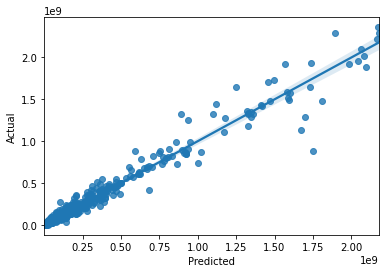

In [27]:
plot = sns.regplot(Y_pred,Y_test)
plot.set(xlabel="Predicted",ylabel = "Actual")

### Insights
 The R2 value between predicted and actual values shows a strong positive correlation

## Decision Tree Regressor

In [28]:
decision_reg = DecisionTreeRegressor(random_state = 0)
decision_reg.fit(X_train, Y_train)
Y_pred = decision_reg.predict(X_test)

### Evaluation Metrics

In [29]:
mse = mean_squared_error(Y_pred,Y_test)
mse

1165779654946752.8

In [30]:
mae = mean_absolute_error(Y_pred,Y_test)
mae

5844223.27772098

In [31]:
#r2_score = r2_score(Y_pred,Y_test)
#r2_score
r2_score = decision_reg.score(X_test,Y_test)

In [32]:
r2_score

0.960289435184359

# K- Nearest Neighbors Regressor

In [33]:
from sklearn.neighbors import KNeighborsRegressor
neighbors_reg = KNeighborsRegressor()
neighbors_reg.fit(X_train, Y_train)
Y_pred = neighbors_reg.predict(X_test)

### Evaluation Metrics

In [34]:
mse = mean_squared_error(Y_pred,Y_test)
mse

1.3200386631169054e+16

In [35]:
mae = mean_absolute_error(Y_pred,Y_test)
mae

37650788.31884558

In [38]:
r2_score = neighbors_reg.score(X_test,Y_test)

In [39]:
r2_score

0.550348295508295